In [1]:
"""
Name: con_example.ipynb
Authors: Christian Haack, Stephan Meighen-Berger
Example of the realistic simulations that can be done
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from contagion import Contagion, config

In [6]:
# Options
config["average social circle"] = 40
config['mean social circle interactions'] = 400
config["population size"] = 10000

In [7]:
# Creating a contagion object
contagion = Contagion()

In [8]:
 # Storing the solutions
config["random state"] = np.random.RandomState(1337)
contagion.sim()

In [9]:
stats = pd.DataFrame(contagion.statistics)

In [10]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.

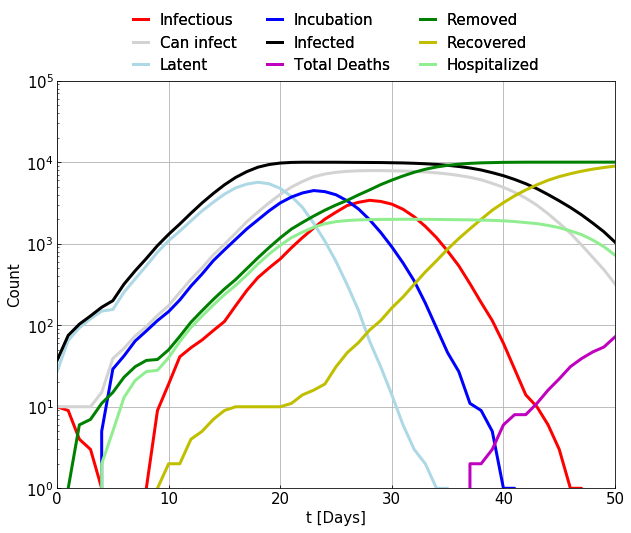

In [11]:
 # Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax.plot(contagion.t, stats['is_infectious'],
        lw=lw, label='Infectious', color='r')
ax.plot(contagion.t, stats['can_infect'],
        lw=lw, label='Can infect', color='lightgrey')
ax.plot(contagion.t, stats['is_latent'],
        lw=lw, label='Latent', color='lightblue')
ax.plot(contagion.t, stats['is_incubation'],
        lw=lw, label='Incubation', color='b')
ax.plot(contagion.t, stats['is_infected'],
        lw=lw, label='Infected', color="k")
ax.plot(contagion.t, stats['is_dead'],
        lw=lw, label='Total Deaths', color="m")
ax.plot(contagion.t, stats['is_removed'],
        lw=lw, label='Removed', color='g')
ax.plot(contagion.t, stats['is_recovered'],
        lw=lw, label='Recovered', color='y')
ax.plot(contagion.t, stats['is_hospitalized'],
        lw=lw, label='Hospitalized', color='lightgreen')
ax.set_xlim(0, 50)
ax.set_ylim(0., config['population size'] * 1.01)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.semilogy()
plt.ylim(1, 1e5)
plt.show()

In [12]:
figure.savefig(PICS + "Contagion_Example.png",
               bbox_inches='tight')

In [13]:
contagion.R0

1600.0